# 1: Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2: Descargar y cargar los datos

In [2]:
import kagglehub
path = kagglehub.dataset_download("grouplens/movielens-20m-dataset")
ratings = pd.read_csv(f"{path}/rating.csv")
movies = pd.read_csv(f"{path}/movie.csv")
tags = pd.read_csv(f"{path}/tag.csv")
genome_scores = pd.read_csv(f"{path}/genome_scores.csv")
genome_tags = pd.read_csv(f"{path}/genome_tags.csv")
links = pd.read_csv(f"{path}/link.csv")

# 3: Vista rápida de los datos

In [3]:
print(ratings.head())
print(movies.head())
print(tags.head())

   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId            tag            timestamp
0      18     4141    Mark Waters  2009-04-24 18:19:40
1      

# 4: Preprocesamiento y limpieza


In [4]:
ratings = ratings.dropna()
movies = movies.dropna()
tags = tags.dropna()

# 5: Análisis exploratorio de datos

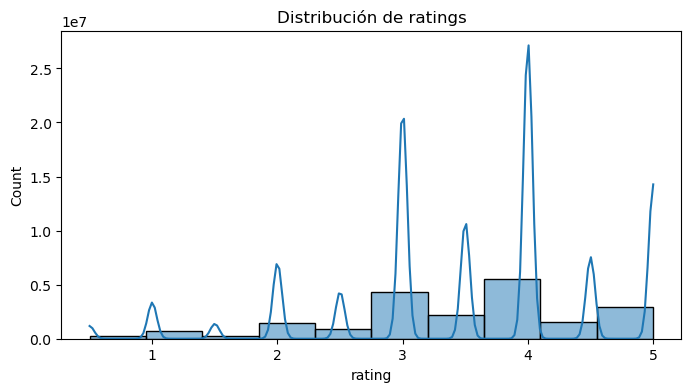

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribución de ratings')
plt.show()

# 6: Crear variable binaria objetivo

In [6]:
ratings['high_rating'] = (ratings['rating'] >= 4).astype(int)

# 7: Ingeniería de características básica
Ejemplo: promedio de rating por usuario y por película

In [7]:
user_avg = ratings.groupby('userId')['rating'].mean().rename('user_avg').reset_index()
movie_avg = ratings.groupby('movieId')['rating'].mean().rename('movie_avg').reset_index()
df = ratings.merge(user_avg, on='userId').merge(movie_avg, on='movieId')

# 8: Selección de variables y división de datos

In [14]:
features = ['user_avg', 'movie_avg']
sample_df = df.sample(n=500000, random_state=42)
X = sample_df[features]
y = sample_df['high_rating']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 9: Entrenamiento de modelo (RandomForest)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# 10: Evaluación del modelo

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.66      0.66     10047
           1       0.66      0.67      0.67      9953

    accuracy                           0.66     20000
   macro avg       0.66      0.66      0.66     20000
weighted avg       0.66      0.66      0.66     20000

[[6581 3466]
 [3266 6687]]


# 11: Importancia de características

In [13]:
importances = model.feature_importances_
for feat, imp in zip(features, importances):
    print(f"{feat}: {imp:.4f}")

user_avg: 0.5500
movie_avg: 0.4500
